In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Đọc file dulieutuyensin
df = pd.read_csv('dulieuxettuyendaihoc.csv',header=0,delimiter=',',encoding='utf-8')

In [ ]:
'''
Phân tích hồi quy tuyến tính
Mục đích: Phân tích tác động hay ảnh hưởng giữa các yếu tố đến mục tiêu (thường đùng
cho các biến (yếu tố) định lượng)
Thường vẽ biểu đồ Scatter để khám phá mối tương quan tuyến tính trước khi khám phá
quan hệ hồi quy tuyến tính
PHƯƠNG PHÁP
1. Xác định biến độc lập (yếu tố) và biến phụ thuộc (mục tiêu)
2. Ghi ra phương trình hồi quy tuyến tính tổng quát y = f(x)
3. Chạy dữ liệu mô hình
4. Đọc các giá trị quan trọng và kết luận
5. Dự báo giá trị biến phụ thuộc khi biết trước giá trị biến độc lập
'''

In [6]:
# Hãy cho biết sự ảnh hưởng của điểm học kì 1 năm lớp 12 đến điểm học kì 2 năm lớp 12
#import statsmodels.api as sm
#pip install statsmodels –cài đặt thư viện này để sử dụng thư viện #statsmadels.api
import statsmodels.api as sm
#linear regression
'''
1. Biến độc lập: học kì 1 (T5)
Biến phụ thuộc : học kì 2 (T6)
2. T6 = f(T5)
= Ao + A1*T5 + epsilon
3. Chạy mô hình
4. Đọc và hiểu kết quả
'''
# adding a constant
X_with_constant = sm.add_constant(df[["T5"]].values)
y = df[['T6']].values
# performing the regression
result = sm.OLS(y,X_with_constant).fit()
# Result of statsmodels
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     151.0
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           1.48e-21
Time:                        16:41:10   Log-Likelihood:                -125.76
No. Observations:                 100   AIC:                             255.5
Df Residuals:                      98   BIC:                             260.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1130      0.402      5.257      0.0

In [ ]:
'''
Căn cứ vào điểm số T5 sẽ giải thích được 60% sự thay đổi của T6 (Adj. R-squared)
Prob (F-statistic) < 0.05: cho biết mô hình có khả năng phù hợp cho tổng thể [nó là pvalue]
const (2,11) chính là A0
x1 là A1
=> T6 = 2.113 + 0.7182 * T5
P>|t| = 0.000 rất nhỏ < 5% => x1 tương ứng với T5 (x` = T5) => biến T5 có ý nghĩa
thống kê trong phương trình này hay nói T5 có
ý nghĩa tham gia đánh giá tác động tới biến T6
'''
'''
Bước 5: Giả sử T5 = 7.5, dự báo T6 = 7.499
'''

In [11]:
# Khám phá sự ảnh hưởng của T6 đến điểm thi LOGIC
# adding a constant
X_with_constant = sm.add_constant(df[["T6"]].values)
y = df[['TOANLOGICPHANTICH']].values
# performing the regression
result = sm.OLS(y,X_with_constant).fit()
# Result of statsmodels
print(result.summary())
'''
Adj. R-squared = 8%: quá ít, không thể giải thích cho điểm LOGIC, nói cách khác k dựa
T6 để gthich dc
Prob (F-statistic) = 0.00230 => phù hợp, bé hơn 0.05, có ý nghĩa thống kê
LOGIC = 2.6287 + 0.2344 * T6
P>|t| = 0.000 < 0.05: T6 có ý nghĩa thống kê
Giả sử T6 = 7.0
=> LOGIC = 4.2695
'''


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     9.798
Date:                Wed, 22 Oct 2025   Prob (F-statistic):            0.00230
Time:                        16:46:35   Log-Likelihood:                -142.46
No. Observations:                 100   AIC:                             288.9
Df Residuals:                      98   BIC:                             294.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6287      0.529      4.965      0.0

'\nAdj. R-squared = 8%: quá ít, không thể giải thích cho điểm LOGIC, nói cách khác k dựa\nT6 để gthich dc\nProb (F-statistic) = 0.00230 => phù hợp, bé hơn 0.05, có ý nghĩa thống kê\nLOGIC = 2.6287 + 0.2344 * T6\nP>|t| = 0.000 < 0.05: T6 có ý nghĩa thống kê\nGiả sử T6 = 7.0\n=> LOGIC = 4.2695\n'

In [12]:
X_with_constant = sm.add_constant(df[["T5","T6"]].values)
y = df[['TOANLOGICPHANTICH']].values
# performing the regression
result = sm.OLS(y,X_with_constant).fit()
# Result of statsmodels
print(result.summary())
'''
1. Độc lập T5,T6
phụ thuộc Logic
2. Logic f(T5,T6)
Logic = A0 + A1*T5 + A2*T6 * epsilon = 2.7072 - 0.0913*T5 + 0.3115 * T6 + epsilon
'''
df = df[['T5','T6','GT','DT','KV','KT','NGONNGU','TOANLOGICPHANTICH','GIAIQUYETVANDE','NGAYTHI','DINHHUONGNGHENGHIEP']]
df.rename(columns={'TOANLOGICPHANTICH':'LOGIC',
'GIAIQUYETVANDE':'UNGXU','DINHHUONGNGHENGHIEP':'HUONGNGHIEP'},inplace=True)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     5.226
Date:                Wed, 22 Oct 2025   Prob (F-statistic):            0.00699
Time:                        16:46:56   Log-Likelihood:                -142.11
No. Observations:                 100   AIC:                             290.2
Df Residuals:                      97   BIC:                             298.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7072      0.539      5.026      0.0

C:\Users\HP\AppData\Local\Temp\ipykernel_20812\1759789774.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'TOANLOGICPHANTICH':'LOGIC',


In [13]:
# Hãy phân tích sự ảnh hưởng của điểm toán học kì 1,2 năm lớp 12 đến điểmNGONNGU
X_with_constant = sm.add_constant(df[["T5","T6"]].values)
y = df[['NGONNGU']].values
# performing the regression
result = sm.OLS(y,X_with_constant).fit()
# Result of statsmodels
print(result.summary())
'''
Adj. R-squared = 1% : quá ít, k gthich dc gì
Prob (F-statistic): 7%
'''

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.3109
Date:                Wed, 22 Oct 2025   Prob (F-statistic):              0.734
Time:                        16:47:20   Log-Likelihood:                -176.45
No. Observations:                 100   AIC:                             358.9
Df Residuals:                      97   BIC:                             366.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8860      0.759      5.117      0.0

'\nAdj. R-squared = 1% : quá ít, k gthich dc gì\nProb (F-statistic): 7%\n'

In [15]:
# Đánh giá mức độ tác động giữa các yếu tố đến 1 đối tượng bằng phân tích hồi quytuyến tính
# Hãy cho biết mức độ tác động của T5, T6 (độc lập) đến điểm LOGIC (phụ thuộc)
# adding a constant
X = df[["T5","T6"]].values
y = df[['LOGIC']].values
# performing the regresssion
result = sm.OLS(y,X).fit()
# result of statsmodels
print(result.summary())
'''
x2 = |0.5934| => T6 tác động mạnh hơn so với T5 (x1 = |0.0063|)
vì x2 dương nên tác động tích cực, còn âm mới tác động tiêu cực (nghịch biến)
'''
# Đánh giá mức độ tác động giữa các yếu tố đến 1 đối tượng bằng phân tích hồi quytuyến tính

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              694.9
Date:                Wed, 22 Oct 2025   Prob (F-statistic):                    1.30e-58
Time:                        16:48:53   Log-Likelihood:                         -153.68
No. Observations:                 100   AIC:                                      311.4
Df Residuals:                      98   BIC:                                      316.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

'\nx2 = |0.5934| => T6 tác động mạnh hơn so với T5 (x1 = |0.0063|)\nvì x2 dương nên tác động tích cực, còn âm mới tác động tiêu cực (nghịch biến)\n'

In [16]:
# Hãy cho biết mức độ tác động của T5, T6 đến điểm UNGXU
# adding a constant
X = df[["T5","T6"]].values
y = df[['UNGXU']].values
# performing the regresssion
result = sm.OLS(y,X).fit()
# result of statsmodels
print(result.summary())
'''
x2 = |0.5318| => T6 tác động mạnh hơn so với T5 (x1 = |0.1519|)
vì x2 dương nên tác động tích cực (đồng biến), còn âm mới tác động tiêu cực (nghịch
biến)
'''

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              612.1
Date:                Wed, 22 Oct 2025   Prob (F-statistic):                    4.24e-56
Time:                        16:49:08   Log-Likelihood:                         -172.41
No. Observations:                 100   AIC:                                      348.8
Df Residuals:                      98   BIC:                                      354.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

'\nx2 = |0.5318| => T6 tác động mạnh hơn so với T5 (x1 = |0.1519|)\nvì x2 dương nên tác động tích cực (đồng biến), còn âm mới tác động tiêu cực (nghịch\nbiến)\n'

BÀI TOÁN PHÂN LỚP

Bài 1

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
# Dựa vào các điểm thi đánh giá năng lực, hãy phân đoán xem sinh viên có định hướng nghề nghiệp hay
# chưa được định hướng nghề nghiệp
# Input: Logic, ngônngữ, ứngxử
# Output: Địnhhướng
# Địnhhướng = f(logic,ngonngu,ungxu)

# TƯƠNG TÍNH Z = A0 + A1 * LOGIC + A2 * NN + A3 * UX + E
# Từ đó tính f(x) = 1/(1+e^-z) thuộc [0,1]
# Nếu mà f(x) > 0.5 thì YES
# Nếu mà f(x) < 0.5 thì NO
# ...

df = pd.read_csv('dulieuxettuyendaihoc.csv', header=0, delimiter=',', encoding='utf-8')


In [19]:
df = df[['NGONNGU','TOANLOGICPHANTICH','GIAIQUYETVANDE','DINHHUONGNGHENGHIEP']]
df.rename(columns={'TOANLOGICPHANTICH':'LOGIC',
                   'GIAIQUYETVANDE':'UNGXU',
                   'DINHHUONGNGHENGHIEP':'DINHHUONG'}, inplace=True)
df.head(5)

NGONNGU  LOGIC  UNGXU DINHHUONG
0     3.25   3.25   4.50        No
1     6.00   4.00   3.50       Yes
2     5.00   6.75   4.00        No
3     4.25   4.25   5.25        No
4     4.25   4.50   5.00        No

In [20]:
dinhhuong = pd.get_dummies(df['DINHHUONG'], drop_first=True)
df.drop(['DINHHUONG'], axis=1, inplace=True)
df = pd.concat([df,dinhhuong], axis=1)
df.head(5)
# Biến đối biến dinhhuong dưới dạng 0 1
# Do biến DINHHUONG là dạng categorical values (định tính) nên cần biến đối về dạng số
# (số hóa) trong bài này biến DINHHUONG
# chi có 2 giá trị Yes/No nên ta dễ dàng biến đổi tương đương 0/1 nhưng nếu như số
# Lượng giá trị nhiều hơn 2 thì ta cần dùng
# phương pháp One hot encoding để biến đối về dạng 1 vector tương ứng

NGONNGU  LOGIC  UNGXU    Yes
0     3.25   3.25   4.50  False
1     6.00   4.00   3.50   True
2     5.00   6.75   4.00  False
3     4.25   4.25   5.25  False
4     4.25   4.50   5.00  False

In [21]:
x = df[['NGONNGU','LOGIC','UNGXU']].values # input
y = df[['Yes']].values # output

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
classifier.coef_
# A1 (ngonngu): 0.27976181
#A2(logic): 0.05558809
# A3 (ungxu): -0.09715109

array([[ 0.27992467,  0.05627405, -0.0966801 ]])

In [ ]:
classifier.intercept_
# A0 = -1.15103264

array([-1.15699883])

In [ ]:
'''
Phương trình phân lớp
p(x) = 1/(1+e^(-z))
Yes = threshhold(p(x) 50 với 0.5)
'''
# Với điểm ngôn ngữ là 7.5, logic là 6.5 và ứng xử là 7.0 thì sinh viên có định hướng hay không
# Đáp án: Yes :?
Z = -1.15103264 + 0.2797618*7.5 + 0.8555889*6.5 -0.09715109*7.0
print(Z)

p = 1/(1+np.exp(-Z))
print(p)
if p>0.5:
    print('Yes')
else:
    print('No')


5.828451079999999
0.9970660023208707
Yes


In [25]:
# Với điểm ngôn ngữ là 7.5, logic là 6.5 và ứng xử là 5.0 thì sinh viên có định hướng hay không
#Đáp án: Yes :?
#Z = 0.628 (đoạn này thay số trên phương trình)
Z = classifier.intercept_ + classifier.coef_[0][0]*7.5 + classifier.coef_[0][1]*6.5 + classifier.coef_[0][2]*5.0
print(Z)

[0.82481694]


In [26]:
p = 1/(1+np.exp(-Z))
print(p)
if p>0.5:
    print('Yes')
else:
    print('No')

[0.69525789]
Yes


In [27]:
def classifier_cal(a,b,c):
    Z = classifier.intercept_ + classifier.coef_[0][0]*a + classifier.coef_[0][1]*b + classifier.coef_[0][2]*c
    return 1/(1+np.exp(-Z))

p = classifier_cal(7.6,6.5,5.0)
print(p)
if p>0.5:
    print('Yes')
else:
    print('No')


[0.70115615]
Yes


In [28]:
# Default threshold is 0.5
y_pred = classifier.predict(X_test)
y_pred

array([False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True, False, False])

In [ ]:
''' 
Changing threshold and predicting
'''
print('Prediction with threshold 0.9: ')
y_pred_new_threshold = (classifier.predict_proba(X_test)[:,1] >= 0.9).astype(int)
print(y_pred_new_threshold)


Prediction with threshold 0.9: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [30]:
result = pd.DataFrame({'Actual': y_test.flatten().astype(int),
                       'Predicted': y_pred.astype(int)})
result.head(10)

Actual  Predicted
0       1          0
1       1          1
2       1          0
3       0          0
4       1          0
5       1          0
6       1          0
7       0          0
8       1          0
9       0          0

In [31]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[12,  2],
       [13,  3]])

Text(0.5, 23.52222222222222, 'Predicted label')

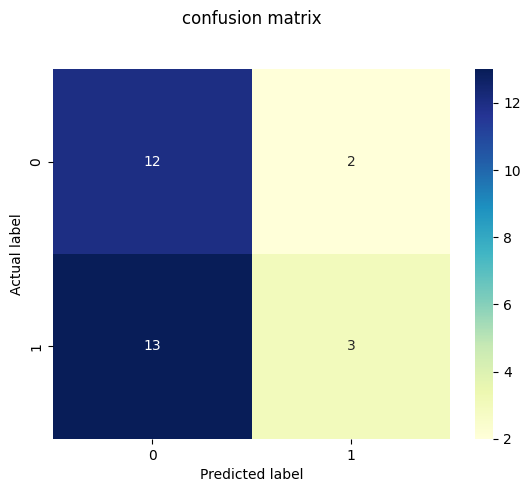

In [32]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5

In [34]:
target_names = ['Not oriented', 'Oriented']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Not oriented       0.48      0.86      0.62        14
    Oriented       0.60      0.19      0.29        16

    accuracy                           0.50        30
   macro avg       0.54      0.52      0.45        30
weighted avg       0.54      0.50      0.44        30



Bài 2

In [ ]:
'''
Dựa vào điểm thi xét tuyển trường IUH cần tuyển những học sinh có điểm thi ưu tiên 
NGÔNNGỮ tốt và LOGIC 
vừa phải để phù hợp với nhu cầu đào tạo. Hãy đưa ra đề xuất các nhóm học sinh có kết quả phù hợp 
và căn cứ vào chỉ tiêu (số lượng sinh viên)

Vấn đề đặt ra: Thế nào là tốt? Thế nào là khá khá? – theo dữ liệu tuyển sinh này
--> Tiêu chuẩn chọn lựa mập mờ => Giải pháp
'''
# Giải thuật gom cụm (Clustering)
'''
Đây là giải thuật có input đầu vào nhưng không có sẵn output đầu ra trong tập dữ liệu lịch sử
Do đó ta gọi là nhóm kỹ thuật un-supervised (học không giám sát)

Để giải quyết nhóm kỹ thuật này ta cần các yếu tố như sau
1. Dữ liệu đầu vào
2. Phải có metric (độ đo) để xác định các phần tử sẽ thuộc về đâu
3. Cần cung cấp trước số lượng cụm (k) được tạo ra

Hệ quả:
1. Các phần tử thuộc về cùng 1 cụm thì có mức độ gần giống (theo độ đo đặt ra) hơn so với phần tử ở cụm khác
2. Mỗi cụm sẽ có một đại diện gọi là trung tâm

--> Trong các giải thuật về dạng toán này thường dùng độ đo Euclide để lượng mức độ gần nhau của các phần tử
--> Giải thuật điển hình là giải thuật K-Means
'''

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [37]:
df = pd.read_csv('dulieuxettuyendaihoc.csv', header=0, delimiter=',', encoding='utf-8')
df.rename(columns={'TOANLOGICPHANTICH':'LOGIC',
                   'GIAIQUYETVANDE':'UNGXU',
                   'DINHHUONGNGHENGHIEP':'HUONGNGHIEP'}, inplace=True)
df

MSSV   T1   T2   T3   T4   T5   T6 GT  DT   KV  NGONNGU  LOGIC  UNGXU  \
0     SV001  7.2  8.4  7.4  7.2  7.4  6.9  F NaN  2NT     3.25   3.25   4.50   
1     SV002  5.4  6.3  4.3  4.9  3.0  4.0  M NaN    1     6.00   4.00   3.50   
2     SV003  5.6  5.0  2.8  6.1  4.8  5.7  M NaN    1     5.00   6.75   4.00   
3     SV004  6.6  5.1  5.9  4.1  6.1  7.4  M NaN    1     4.25   4.25   5.25   
4     SV005  6.0  5.4  7.6  4.4  6.8  8.0  M NaN  2NT     4.25   4.50   5.00   
..      ...  ...  ...  ...  ...  ...  ... ..  ..  ...      ...    ...    ...   
95   SV0096  8.6  8.9  7.7  6.7  7.9  6.6  F NaN    1     5.25   1.50   6.25   
96   SV0097  3.7  4.1  3.1  3.4  5.5  5.7  F NaN    1     5.25   3.75   4.75   
97   SV0098  8.8  9.5  9.5  8.5  9.0  8.5  M NaN  2NT     7.00   8.00   4.00   
98   SV0099  2.7  2.8  6.2  5.2  4.1  4.3  M NaN    1     5.00   3.50   5.50   
99  SV00100  4.1  4.4  6.0  4.3  5.6  5.1  M NaN  2NT     5.25   2.50   4.25   

    KT    NGAYTHI HUONGNGHIEP  
0   A1  12/7/2018          No  
1    C  12/7/2018         Yes  
2    C  12/7/2018          No  
3   D1  12/7/2018          No  
4    A  12/7/2018          No  
..  ..        ...         ...  
95   C  7/20/2022         Yes  
96   C  7/20/2022          No  
97   C  7/20/2022         Yes  
98   C  7/20/2022          No  
99   C  7/20/2022         Yes  

[100 rows x 16 columns]

In [38]:
data = df[['NGONNGU', 'LOGIC']]

In [39]:
data.head(5)

NGONNGU  LOGIC
0     3.25   3.25
1     6.00   4.00
2     5.00   6.75
3     4.25   4.25
4     4.25   4.50

In [40]:
#độ đo Euclid
d = np.sqrt((3.25-6.0)**2+(3.25-4.0)**2)
d

np.float64(2.850438562747845)

In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(data)

In [42]:
print(kmeans.cluster_centers_)  # Số tâm
print(kmeans.inertia_)          # Độ đo đánh giá
print(kmeans.n_iter_)           # Số lần lặp bao nhiêu lần để tìm giá trị điển hình
print(kmeans.labels_[:])
# 100 sinh viên được chia tối đa 100 cụm
# Tâm là 1 đại lượng được tính toán bằng thuật toán.

[[2.58       4.29      ]
 [4.61805556 4.16666667]
 [5.14285714 2.25      ]
 [6.10714286 6.46428571]]
101.42862103174605
4
[0 1 3 1 1 0 3 1 0 1 0 3 0 0 0 1 0 1 0 0 0 0 1 3 2 2 1 1 0 0 1 1 1 0 0 0 1
 0 0 0 1 1 1 0 1 0 2 3 1 0 0 0 1 0 1 1 3 0 0 0 0 0 2 0 1 0 1 1 1 0 0 0 0 0
 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 2 2 1 3 1 2]


In [43]:
def euclid(a1,a2,b1,b2):
    d = np.sqrt((a1-b1)**2+(a2-b2)**2)
    return d
euclid(3.25,3.25,2.11,4.31)

np.float64(1.5566630977832037)

In [ ]:
# metric: thuật toán

In [44]:
kmeans1 = KMeans(n_clusters=6).fit(data)

In [45]:
print(kmeans.cluster_centers_) # Số tâm
print(kmeans.inertia_) # Độ đo đánh giá
print(kmeans.n_iter_) # Sẽ lặp bao nhiêu lần để tìm giá trị điển hình tối ưu
print(kmeans.labels_[:])

[[2.58       4.29      ]
 [4.61805556 4.16666667]
 [5.14285714 2.25      ]
 [6.10714286 6.46428571]]
101.42862103174605
4
[0 1 3 1 1 0 3 1 0 1 0 3 0 0 0 1 0 1 0 0 0 0 1 3 2 2 1 1 0 0 1 1 1 0 0 0 1
 0 0 0 1 1 1 0 1 0 2 3 1 0 0 0 1 0 1 1 3 0 0 0 0 0 2 0 1 0 1 1 1 0 0 0 0 0
 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 2 2 1 3 1 2]


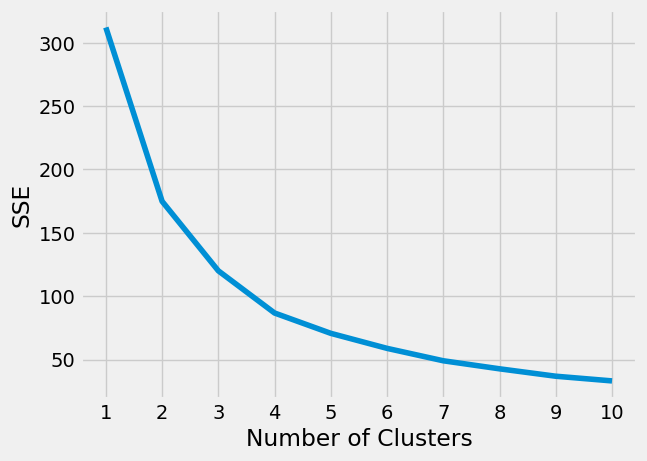

In [46]:
# Chọn số cụm tốt nhất
# url: https://realpython.com/k-means-clustering-python
# https://dataofish.com/k-means-clustering-python

kmean_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
sse = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, **kmean_kwargs)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [48]:
# Cách 2: Dùng phương pháp độ dốc ELBOW để tìm số cụm là tốt nhất
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print(kl.elbow)

4


In [49]:
# Xây dựng ứng dụng hiển thị danh sách sinh viên và nhãn (label)
# Cụm sinh viên thuộc vào
kmeans = KMeans(n_clusters=4).fit(data)
data['ClusterLabel'] = kmeans.labels_[:]
print(data[['NGONNGU', 'LOGIC', 'ClusterLabel']])

    NGONNGU  LOGIC  ClusterLabel
0      3.25   3.25             3
1      6.00   4.00             1
2      5.00   6.75             2
3      4.25   4.25             1
4      4.25   4.50             1
..      ...    ...           ...
95     5.25   1.50             1
96     5.25   3.75             1
97     7.00   8.00             2
98     5.00   3.50             1
99     5.25   2.50             1

[100 rows x 3 columns]


C:\Users\HP\AppData\Local\Temp\ipykernel_20812\3712226342.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ClusterLabel'] = kmeans.labels_[:]


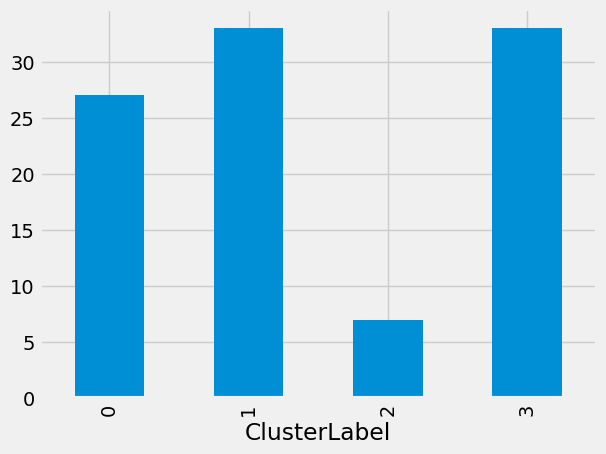

In [50]:
gr_data = data.groupby(['ClusterLabel']).size()
gr_data.plot.bar()
plt.show()

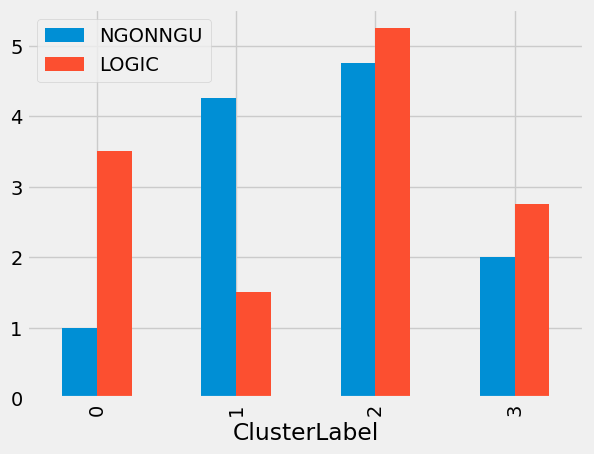

In [51]:
gr_data_min = data.groupby(['ClusterLabel'])[['NGONNGU', 'LOGIC']].min()
gr_data_min.plot.bar()
plt.show()

In [52]:
gr_data_mean = data.groupby(['ClusterLabel'])[['NGONNGU', 'LOGIC']].mean()
gr_data_mean.plot(kind='bar')
plt.show()